In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [18]:
np.random.seed(42)

In [87]:
x = np.linspace(0, 10, 100)
y = 3 * x + 4 + np.random.normal(0, 5, x.shape[0])

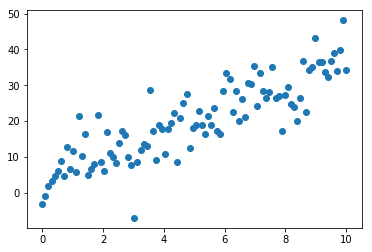

In [113]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [114]:
m = np.random.rand()
c = np.random.rand()

In [115]:
def f(x, m, c):
    return m*x + c

In [116]:
reg_y = f(x, m, c)

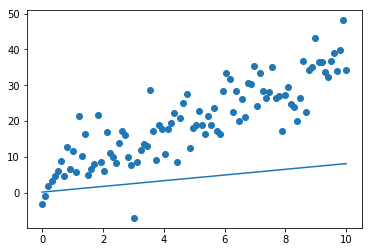

In [117]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()

version 1

In [118]:
# least square
mu_x = np.mean(x)
mu_y = np.mean(y)

m = np.sum((x-mu_x)*(y-mu_y)) / np.sum(np.power(x-mu_x, 2))
c = mu_y - m*mu_x

In [121]:
print(m)
print(c)

3.2970072435973914
3.6680099116452674


In [119]:
reg_y = f(x, m, c)

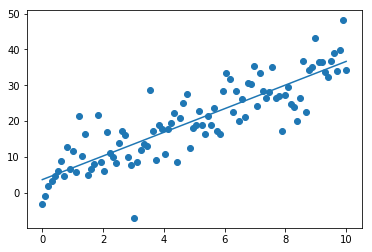

In [120]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()

version 2

In [141]:
x_1 = x.reshape(-1, 1)
x_2 = np.full(x.shape, 1).reshape(-1, 1)
xx = np.hstack([x_1, x_2])
m = np.dot(np.dot(np.linalg.inv(np.dot(xx.T, xx)), xx.T), y)

In [145]:
m

array([3.29700724, 3.66800991])

In [146]:
reg_y = f(x, m[0], m[1])

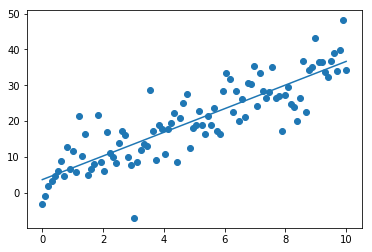

In [144]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()

version 3

In [147]:
x_1 = x.reshape(-1, 1)
x_2 = np.full(x.shape, 1).reshape(-1, 1)
xx = np.hstack([x_1, x_2])
m, c = np.linalg.lstsq(xx, y, rcond=None)[0]

In [150]:
display(m)
c

3.297007243597391

3.6680099116452705

In [148]:
reg_y = f(x, m, c)

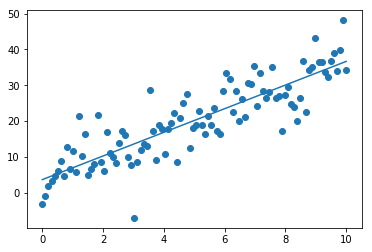

In [149]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg_y)
plt.show()